# Heat-Wave 

The goal is:

Based on the current climate scenarious the occurrence of the heat-wave phenomenon should be more frequent in the future in Europe. The main problems connected with Heat-wave events are the overheating of the urban areas, which lowers comfort of living or causes health issues [https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022EF002682], drought, and water scarcity. Nowadays, there are a lot of studies and methodologies on how we can mitigate the influence of these events. This toolbox wants to answer a simple questions which are more frequently ask by the crisis managemnt local authorities, urban planers or policy makers. These questions are:

- Where we can expect? (places and magnitude)
- How often? (frequency of the occurence)
- How to prevent? (mitigation measures)

This toolbox tries to cover all these problems in five steps:

1. Focusing on the past trends of the Heat occurrence for a better understanding of the rising magnitude of the Heat-connected events.

2. Using the climate scenarios for a better understanding of the frequency of heat occurrence in the future on a global (EU) and local scale (cities or interested areas)

3. Focusing on the interested areas, especially on identifying the areas which can be overheated

4. Exposure and vulnerability of the population in the overheated areas. 

5. Looking for the reason why this area is overheated and how we can prevent 


Data [this is only a register of data]:
- CDS EURO-CORDEX climatic data for 2m air temperature 2026-2041 ... 2100? and instrumental preiod 2016-2020 (11km spatial; 1day temporal) ### CDS API ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cordex-domains-single-levels?tab=form
- CDS Climate variables for cities (only for bigger EU cities, NOT for whole EU) (100m) in Europe from 2008 to 2017 ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-urban-climate-cities?tab=overview
- CDS EURO-CORDEX Heat-wave projections rcp 4.5 rcp 8.5 (11km) ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=form

[Code for the estimation of the heat-wave events for EU]
######
[EURO-CORDEX (11km) data for the Heat-wave events. The data from Euro-Corex are already precalculated for bigger cities in EU.]
######
- LANDSAT8 land surface temperature for the 2016-2020 (15-30m spatial; 8-16 days tremporal) ### https://rslab.gr/Landsat_LST.html
######
- CHELSA climatic data downscaled from CMIP6 (1km spatial; monthly values, daily values are not available) ### https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F ### https://chelsa-climate.org/
######
- World population: https://data.humdata.org/dataset/worldpop-age-and-sex-structures-for-slovakia
######
- SENTINEL2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI) ### https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-
######
Githhub:
#### https://github.com/CLIMAAX/HEATWAVES


# Import packages

If there be some problems with the instalation of the packages, please let me know. I experience difficulties with the cartopy package on Windows. 

In [31]:
import zipfile        # working with the zip folders #
import os             # handling the current working directory
import rasterio       # netcdf and raster processing  #
from pathlib import Path # file system paths
import rioxarray as rxr # netcdf and raster processing
import cdsapi         # API downloading
import numpy as np    # 2-3D array data handling
import pandas as pd   # data handling #
import xarray as xr   # 2-3D array data handling 
from osgeo import gdal # Geo data handling 
import cartopy.crs as ccrs # netcdf data projection 
import cartopy.feature as cf # netcdf data projection 
import cartopy.crs as ccrs # netcdf data projection 
import matplotlib as mpl  #  data plot #
import matplotlib.pyplot as plt #  data plot #
from rasterio.crs import CRS  #  raster dat handling 
from pylab import pcolormesh,show,colorbar,plot,title,legend,subplot,savefig
from xrspatial.classify import reclassify
from matplotlib import pyplot
from rasterio.plot import show
from glob import glob
import geopandas as gpd
import rasterio as rio

# Create a directory structure

In [2]:
# Define the directory for the flashflood workflow preprocess
workflow_folder = 'Heat_workflow'

# Define directories for data and results within the previously defined workflow directory
data_dir = os.path.join(workflow_folder,'data')
results_dir = os.path.join(workflow_folder,'results')

# Check if the workflow directory exists, if not, create it along with subdirectories for data and results
if not os.path.exists(workflow_folder):
    os.makedirs(workflow_folder)
    os.makedirs(os.path.join(data_dir))
    os.makedirs(os.path.join(results_dir))

# 1. Trends of the Heat-Days occurence in the past

- On the website Climate-adapt we can find the tredns of the occurence of the days with Extreme heat. The content in the European Climate Data Explorer pages is delivered by the Copernicus Climate Change Service (C3S) implemented by ECMWF. 
- We select the region of Slovakia where we can also find the Zilina city, this is the estimation for the whole region NUTS2
- Our toolbox in the next steps will provide an informations from a closer perspective over the Zilina city and Europe.

https://climate-adapt.eea.europa.eu/en/metadata/indicators/high-utci-days


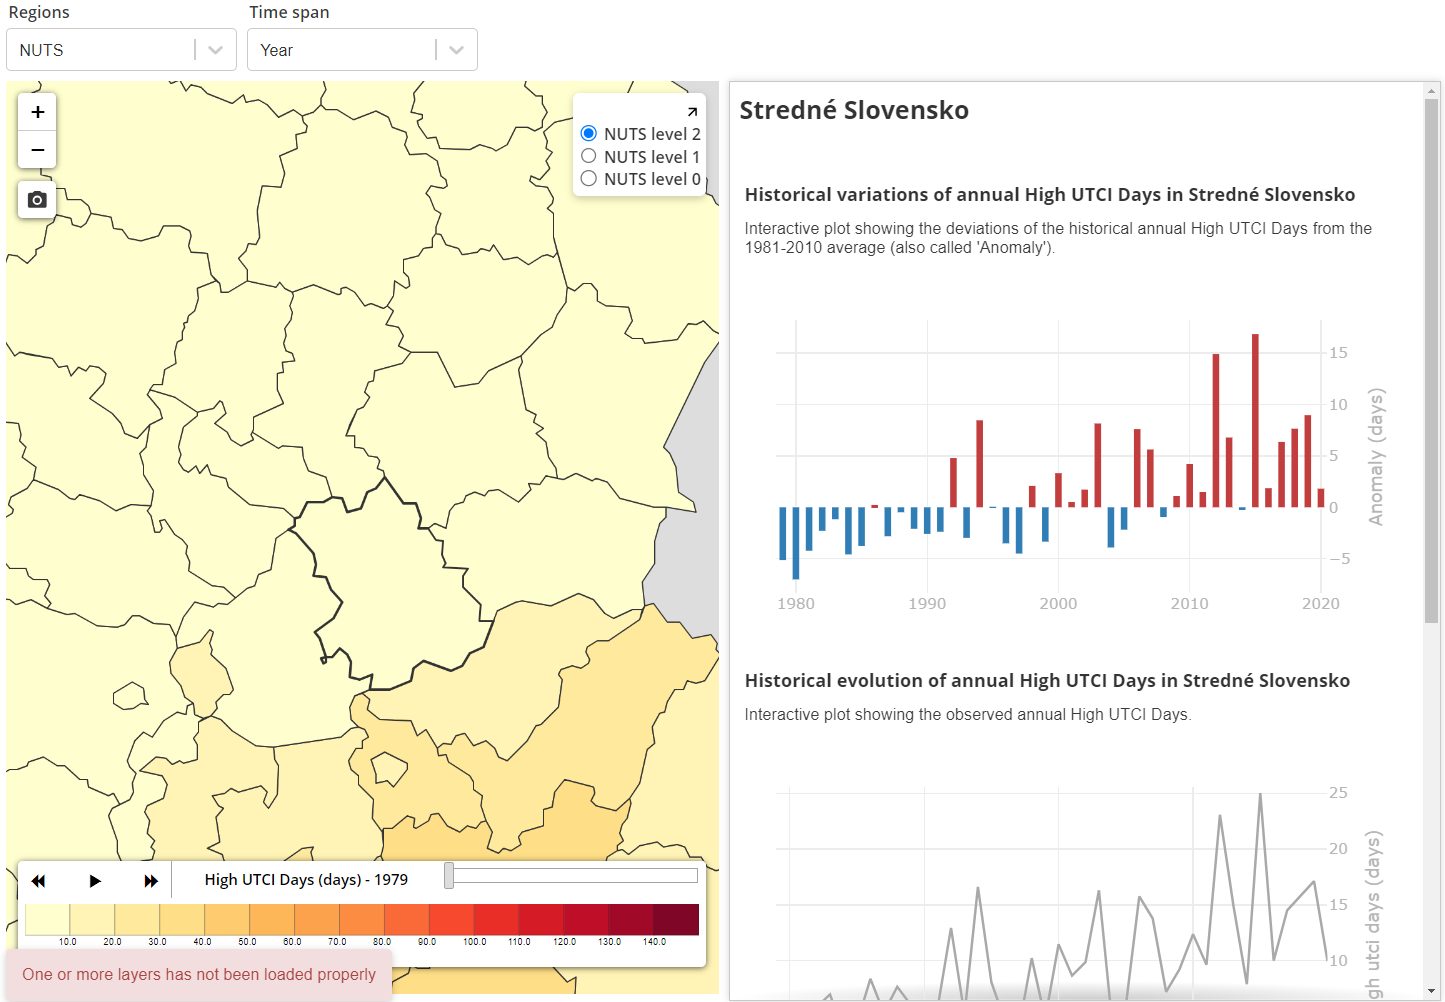

# Observed temperature over Europe 

- In this part of the notebook we compare the Heat-Wave occurence in the past and Heat wave occurence in the future for the whole Europe and Zilina city in 12.5 km resolution

### Observed temperature Europe 2011-2023

In [11]:
# This takes time!!!
# Change KEY!!!
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "XXXXX:xxxxxxxxxxxxxxxxxxx"
c = cdsapi.Client(url=URL, key=KEY)

zip_path = os.path.join(data_dir, 'eobs_airtemp_2011_2023.zip')

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'maximum_temperature',
        'grid_resolution': '0.1deg',
        'period': '2011_2023',
        'version': '28.0e',
        'format': 'zip',
    },
   f"{data_dir}/eobs_airtemp_EU_2011_2023.zip")

2024-01-17 09:11:15,302 INFO Welcome to the CDS
2024-01-17 09:11:15,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
2024-01-17 09:11:15,391 INFO Request is completed
2024-01-17 09:11:15,392 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-insitu-gridded-observations-europe-398bac12-3f5a-41e5-b51f-3499fe0cf8c7.zip to Heat_workflow\data/eobs_airtemp_EU_2011_2023.zip (839.8M)
2024-01-17 09:13:56,360 INFO Download rate 5.2M/s                                                                      


Result(content_length=880543159,content_type=application/zip,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-insitu-gridded-observations-europe-398bac12-3f5a-41e5-b51f-3499fe0cf8c7.zip)

In [ ]:
# Define zip file's absolute path
zip_path = os.path.join(data_dir, 'eobs_airtemp_EU_2011_2023.zip')
# Extract from zip file
with zipfile.ZipFile(zip_path, 'r') as zObject:
    zObject.extractall(path=data_dir)

### Past Heat-waves in Europe

In [3]:
# unzip the file in the folder and read 
at = f'{data_dir}/tx_ens_mean_0.1deg_reg_2011-2023_v28.0e.nc'
#at = xr.open_mfdataset(f'{data_dir}/eobs_airtemp_2011_2023/tx_*.nc', decode_coords='all') # to read a multiple datasets 
at=xr.open_dataset(at)
at=xr.decode_cf(at,decode_coords="all")
# write the CRS 
at.rio.write_crs("epsg:4326", inplace=True)
at=at['tx']
atEU=at
# clip to area (Zilina)
at_city=at.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# at_city2=at_city.sel(time=slice("2000-06-30", "2023-06-30")) # to select a time period

In [16]:
# Divide the time series to months 
at=atEU.groupby('time.month').groups

# Calculate the heat wave occurence for all months in given period  
for i in range (1, 13):
    at_idxs=at[i]

    # Extract the  months by selecting the relevant indices
    at_max=atEU.isel(time=at_idxs)
    
    at90=at_max.quantile(0.90,'time')
    #at90=at_max.chunk(dict(time=-1)).quantile(0.90,'time')
    
    heatat=xr.where(at_max>at90, 1, 0)

    # we select jul 
    # Create + time dataset
    vat=heatat
    v1at=heatat[:-1,:,:]
    v2at=heatat[:-2,:,:]
    v3at=heatat[:-3,:,:]
    # Create missing days
    t1at=heatat[0:1,:,:]
    t2at=heatat[0:2,:,:]
    t3at=heatat[0:3,:,:]
    # Concatenate missing dates to + time dataset
    vi1at=xr.concat([t1at, v1at], dim='time')
    vi2at=xr.concat([t2at, v2at], dim='time')
    vi3at=xr.concat([t3at, v3at], dim='time')
    # Change the time dimesion for correct one
    tiat=heatat["time"]
    # add a time dimension
    vi1at["time"]=tiat
    vi2at["time"]=tiat
    vi3at["time"]=tiat
    # Sum of the Heat-Wave
    sumvat=xr.where((vat==1)&(vi1at==1)&(vi2at==1), 1, 0) # count 3 day HW
    sumv2at=xr.where((vat==1)&(vi1at==1)&(vi2at==1)&(vi3at==1), -1, 0) # delete 4 and more day, it is need to be done because we need to countthe HW as 1
    HW1at=sumvat.sum(dim='time')
    HW2at=sumv2at.sum(dim='time')
    HWat=HW1at+HW2at
    #pcolormesh(HWa);colorbar();title('Heat-Waves events Zilna');show() # let us view the map...
    #HWat.rio.to_raster(raster_path=f'{data_dir}/era5_daily_t2m_eurminmax_2040/HW_' + str(i) + '.tif')
    HWat.rio.to_raster(raster_path=f'{data_dir}/HWEUpast_' + str(i) + '.tif')

In [17]:
# Read a paths for Heat-waves
HW = sorted (glob(f"{data_dir}/HWEUpast_*.tif"), key=os.path.getmtime)
# Create a raster stack 
with rasterio.open(HW[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(HW))
#
with rasterio.open(f'{data_dir}/stackHWEUpast.tif','w', **meta) as dst:
    for id, layer in enumerate(HW, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

### Plot data

Text(0, 0.5, 'number of Heat-waves')

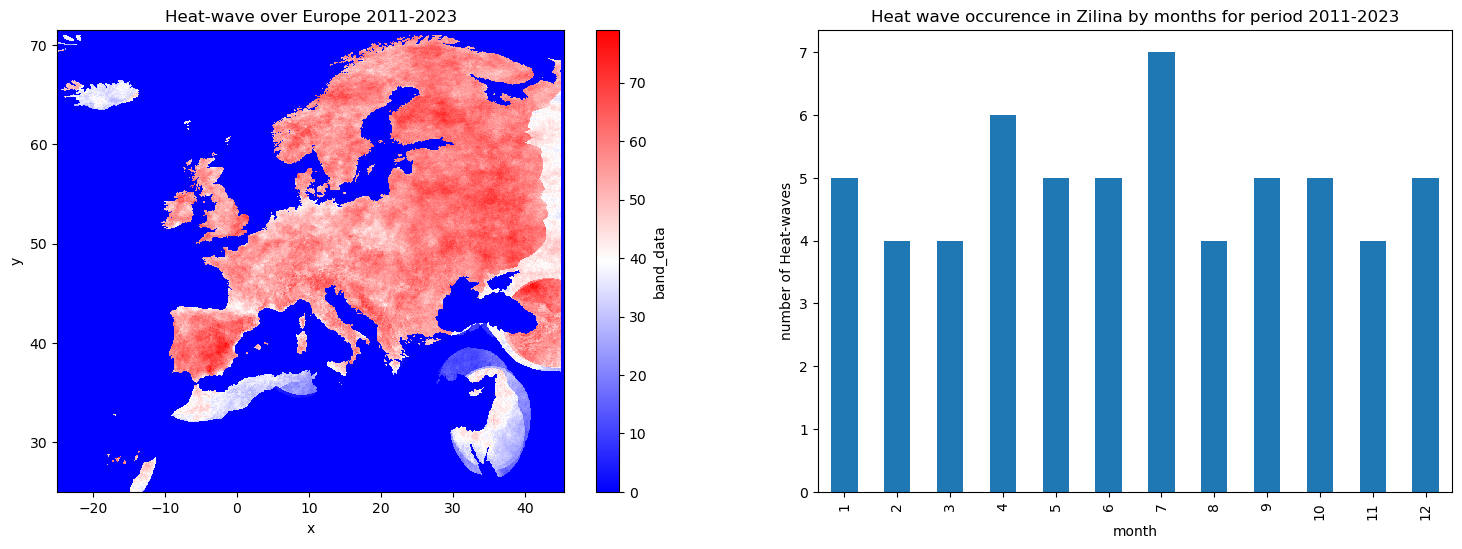

In [4]:
# Read a raster stack for 12 months for EU
HWEUp_11_23=f'{data_dir}/stackHWEUpast.tif'
HWEUp_11_23= xr.open_dataset(HWEUp_11_23)
HWEUp_11_23=HWEUp_11_23.sum(dim='band', skipna=True,  keep_attrs=True)
HWEUp_11_23=HWEUp_11_23['band_data']
# Read a raster stack for 12 months for Zilina
ZApast=f'{data_dir}/stackHWEUpast.tif'
ZApast= xr.open_dataset(ZApast)
ZApast=ZApast['band_data']
ZApast=ZApast.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
ZApast=ZApast.isel(x= 1, y=1)
serZApast = ZApast.to_series()
# Plot a data for EU and Zilina
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
HWEUp_11_23.plot(ax=axes[0], cmap='bwr')
axes[0].set_title('Heat-wave over Europe 2011-2023')
serZApast.plot.bar(ax=axes[1])
axes[1].set_title('Heat wave occurence in Zilina by months for period 2011-2023') 
axes[1].set_xlabel('month')
axes[1].set_ylabel('number of Heat-waves')

### Save data on disk

In [19]:
HWEUp_11_23.rio.write_crs("epsg:4326", inplace=True)
HWEUp_11_23
HWEUp_11_23.rio.to_raster(raster_path=f'{results_dir}/HWEUpast.tif')

# 2. Trends of the Heat-Days occurence in the future

Downloading of the Euro-Cordex data for max, min and mean air temperature (API).

- Download of the data for the projections 2021-2100 (one netcdf file cover the 5 year period e.g. 2016-2020)

Manual for the use of the CDS API: https://cds.climate.copernicus.eu/api-how-to

For the downloading of the data you need to login to Copernicus Climate Data Store, where you will find yours KEY for data downloading. 

###  Projection data Cordex 2031-2045
- Data are downloaded from: https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cordex-domains-single-levels?tab=form

In [27]:
# Change KEY!!!
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "XXXXX:xxxxxxxxxxxxxxxxxxx"
c = cdsapi.Client(url=URL, key=KEY)

# Define zip file's absolute path
zip_path = os.path.join(data_dir, 'era5_daily_t2m_eurminmax_2031_2045.zip')

c.retrieve(
    'projections-cordex-domains-single-levels',
    {
        'format': 'zip',
        'domain': 'europe',
        'experiment': 'rcp_8_5',
        'horizontal_resolution': '0_11_degree_x_0_11_degree',
        'temporal_resolution': 'daily_mean',
        'variable': 'maximum_2m_temperature_in_the_last_24_hours',
        'gcm_model': 'cnrm_cerfacs_cm5',
        'rcm_model': 'clmcom_clm_cclm4_8_17',
        'ensemble_member': 'r1i1p1',
        'start_year': [
            '2031', '2036', '2041',
        ],
        'end_year': [
            '2035', '2040', '2045',
        ],
    },
   f"{data_dir}/era5_daily_t2m_eurminmax_2031_2045.zip")

2024-01-18 08:59:27,289 INFO Welcome to the CDS
2024-01-18 08:59:27,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cordex-domains-single-levels
2024-01-18 08:59:27,485 INFO Request is queued
2024-01-18 08:59:28,556 INFO Request is running
2024-01-18 09:07:47,926 INFO Request is completed
2024-01-18 09:07:47,929 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-projections-cordex-domains-single-levels-6a6f2be5-6db6-4d88-b592-865937532013.zip to Heat_workflow\data/era5_daily_t2m_eurminmax_2031_2045.zip (2G)
2024-01-18 09:22:43,827 INFO Download rate 2.2M/s                                                                      


Result(content_length=2099233610,content_type=application/zip,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-projections-cordex-domains-single-levels-6a6f2be5-6db6-4d88-b592-865937532013.zip)

In [29]:
# Define zip file's absolute path
zip_path = os.path.join(data_dir, 'era5_daily_t2m_eurminmax_2031_2045.zip')
with zipfile.ZipFile(zip_path, 'r') as zObject:
    zObject.extractall(path=data_dir)

PermissionError: [Errno 13] Permission denied

### Load of the Euro-Cordex tasmax

Downloaded data are in the 5 year step. For the load of the data we need to select the directory and then start computing:
1. Load the data, downloaded data are for period 2021-2040 (or more years...)
2. Convert the unit from K to C 
3. Calculate the monthly means values, you can also download precalculated data but you can calculate it easily without downloading
4. Set CRS to rotated pole. If you want to export map an use it in GIS software, you need to set the coordinated system.

### Euro-Cordex daily maximum data 2023-2040

In [5]:
# 1. Data are for 5 year periods, you can select one which you prefer or merge all in one... 
dmax = xr.open_mfdataset(f'{data_dir}/tasmax*.nc', decode_coords='all')
# 2. Convert from K to °C
dmax=dmax['tasmax']
tasmax=dmax - 273.15
tasmax=tasmax.assign_attrs(dmax.attrs)
tasmax.attrs['units']='°C'
# Select a time period
tasmax=tasmax.sel(time=slice("2031-01-01", "2043-12-31"))
# Clip tasmax to Zilina
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
tasmax.rio.write_crs(rotated_pole, inplace=True)
tasmaxZA=tasmax.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)

# 3. Calculate the monthly means values
monthly_max_projection = tasmax.groupby('time.month').max(keep_attrs=True)

# 4. Setting of the Coordinated system
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_max_projection.rio.write_crs(rotated_pole, inplace=True)

<xarray.DataArray 'tasmax' (month: 12, rlat: 412, rlon: 424)>
dask.array<stack, shape=(12, 412, 424), dtype=float32, chunksize=(1, 412, 424), chunktype=numpy.ndarray>
Coordinates:
  * rlat                        (rlat) float64 -23.38 -23.26 ... 21.73 21.83
  * rlon                        (rlon) float64 -28.38 -28.26 ... 18.05 18.16
    rotated_latitude_longitude  int32 -2147483647
    lat                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    height                      float64 2.0
  * month                       (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref                 int32 0
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             °C
    cell_methods:      time: maximum
    history:           2014-03-26T13:11:29Z altered by CMOR: Treated scalar d...
    associated_files:  gridspecFile: gridspec_atmos_fx_CLMcom-CCLM4-8-17_rcp8...

### Euro-Cordex T max for Heat-Wave   

For The heat-wave we use the EURO-CORDEX (or Chelsa only to consider) daily maximum temperature data. We used the methodology from the PESETA IV project https://joint-research-centre.ec.europa.eu/peseta-projects/jrc-peseta-iv_en

The HWMId is defined as the maximum magnitude of heat waves in a year. Specifically, a heat wave is defined as a period ≥ 3 consecutive days with maximum temperature above a daily threshold calculated for a 30-year-long reference period (for the purpose of testing we choose shorter period). At least 30-year time series of daily vales are needed to obtain a robust estimation of the indicator. The threshold is defined as the 90th percentile of daily maxima temperature, centred on a 31-day window.

1. We divide the data to months for the period which we have a data 2026-2040
2. Setting of the CRS
3. Clip data to interested area
4. Calculate the treshold of the 90 percentile for each month of the given period
5. Calculate the sum of the day which exceeding the treshold for each month for given period
6. Plot the maps of the sum of the day which exceeding the treshold for summer months 
7. HEAT-WAVE identification for the each month (number of heat-wave events for each month)
8. HEAT-WAVE events plot


### Heat waves for Europe projections

In [26]:
# Divide the time series to months 
tasmax_month=tasmax.groupby('time.month').groups

# Calculate the heat wave occurence for all months in given period  
for i in range (1, 13):
    #at_idxs=at[i]
    tasmax_idxs=tasmax_month[i]

    # Extract the  months by selecting the relevant indices
    #at_max=at_city.isel(time=at_idxs)
    tas_max=tasmax.isel(time=tasmax_idxs)
    
    # 90 percentile 
    #junq90_maxZA=jun_maxZA.chunk(dict(time=-1)).quantile(0.90,'time')
    tas_max90=tas_max.chunk(dict(time=-1)).quantile(0.90,'time')
    
    heatpt=xr.where(tas_max>tas_max90, 1, 0)

    # we select jul 
    # Create + time dataset
    vat=heatpt
    v1at=heatpt[:-1,:,:]
    v2at=heatpt[:-2,:,:]
    v3at=heatpt[:-3,:,:]
    # Create missing days
    t1at=heatpt[0:1,:,:]
    t2at=heatpt[0:2,:,:]
    t3at=heatpt[0:3,:,:]
    # Concatenate missing dates to + time dataset
    vi1at=xr.concat([t1at, v1at], dim='time')
    vi2at=xr.concat([t2at, v2at], dim='time')
    vi3at=xr.concat([t3at, v3at], dim='time')
    # Change the time dimesion for correct one
    tiat=heatpt["time"]
    # add a time dimension
    vi1at["time"]=tiat
    vi2at["time"]=tiat
    vi3at["time"]=tiat
    # Sum of the Heat-Wave
    sumvat=xr.where((vat==1)&(vi1at==1)&(vi2at==1), 1, 0) # count 3 day HW
    sumv2at=xr.where((vat==1)&(vi1at==1)&(vi2at==1)&(vi3at==1), -1, 0) # delete 4 and more day, it is need to be done because we need to countthe HW as 1
    HW1at=sumvat.sum(dim='time')
    HW2at=sumv2at.sum(dim='time')
    HWat=HW1at+HW2at
    #pcolormesh(HWa);colorbar();title('Heat-Waves events Zilna');show() # let us view the map...
    #HWat.rio.to_raster(raster_path=f'{data_dir}/era5_daily_t2m_eurminmax_2040/HW_' + str(i) + '.tif')
    HWat.rio.to_raster(raster_path=f'{data_dir}/HWEUproj_' + str(i) + '.tif')

In [28]:
# Read a paths for Heat-waves
HWEUp = sorted (glob(f"{data_dir}/HWEUproj_*.tif"), key=os.path.getmtime)
# Create a raster stack 
with rasterio.open(HWEUp[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(HWEUp))
#
with rasterio.open(f'{data_dir}/stackHWEUproj.tif','w', **meta) as dst:
    for id, layer in enumerate(HWEUp, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Text(0, 0.5, 'number of Heat-waves')

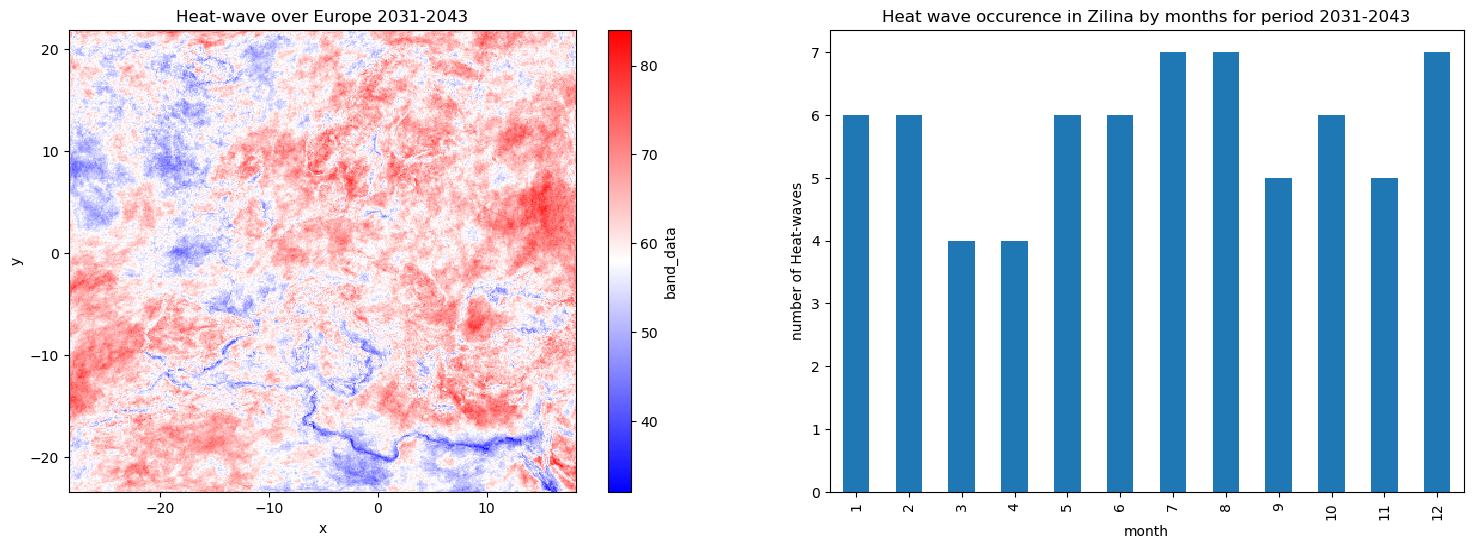

In [6]:
# Read a raster stack for 12 months for EU
HWEUp_23_40=f'{data_dir}/stackHWEUproj.tif'
HWEUp_23_40= xr.open_dataset(HWEUp_23_40)
HWEUp_23_40=HWEUp_23_40.sum(dim='band', skipna=True,  keep_attrs=True)
HWEUp_23_40=HWEUp_23_40['band_data']
# Read a raster stack for 12 months for Zilina
ZAproj=f'{data_dir}/stackHWEUproj.tif'
ZAproj= xr.open_dataset(ZAproj)
ZAproj=ZAproj['band_data']
ZAproj=ZAproj.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)
ZAproj=ZAproj.isel(x= 1, y=1)
serZAproj = ZAproj.to_series()
# Plot a data for EU and Zilina
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
HWEUp_23_40.plot(ax=axes[0], cmap='bwr' )
axes[0].set_title('Heat-wave over Europe 2031-2043')
serZAproj.plot.bar(ax=axes[1])
axes[1].set_title('Heat wave occurence in Zilina by months for period 2031-2043') 
axes[1].set_xlabel('month')
axes[1].set_ylabel('number of Heat-waves')

The Euro-Cordex climate projection for ait temperature covers also the seas and oceans, so the picture is different from observed data !!!

In [30]:
# Save data on disk
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
HWEUp_23_40.rio.write_crs(rotated_pole, inplace=True)
HWEUp_23_40.rio.to_raster(raster_path=f'{results_dir}/HWEUproj.tif')

# Comparison of the past and future heat waves

Text(0, 0.5, 'number of Heat-waves')

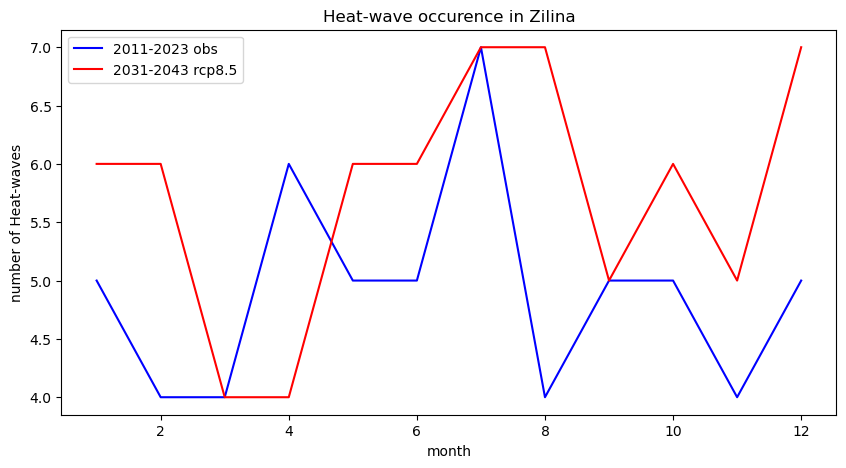

In [51]:
fig, ax=plt.subplots(figsize=(10,5))
serZApast.plot.line(ax=ax, color='blue')
serZAproj.plot.line(ax=ax, color='red')
ax.set_title('Heat-wave occurence in Zilina')
#plt.legend(loc="upper left")
#plt.legend(['First List', 'Second List'], loc='upper left')
plt.gca().legend(('2011-2023 obs','2031-2043 rcp8.5'))
ax.set_xlabel('month')
ax.set_ylabel('number of Heat-waves')

### Heat-Waves packages thermofeel, xclim, hotspell  



These are another packages which can be used for the detections of the heat wave events 
Thermofeel, xclim, hotspell are the packages which should be suitable for the extraction of the heat-wave events.  https://pypi.org/project/thermofeel/
## https://pypi.org/project/thermofeel/ 
## https://xclim.readthedocs.io/en/stable/indices.html  
## https://hotspell.readthedocs.io/en/latest/  

# 3 Heat islands identification

#### Heat islands

Heat islands are urbanized areas that experience higher temperatures than outlying areas. Structures such as buildings, roads, and other infrastructure absorb and re-emit the sun’s heat more than natural landscapes such as forests and water bodies. Urban areas, where these structures are highly concentrated and greenery is limited, become “islands” of higher temperatures relative to outlying areas. [https://www.epa.gov/heatislands]
For the identification of the heat islands from the historical data we can use these data:

Data, needs to be manually downloaded from provided websites, it requires registration and manual choosing of your area and time period (except Euro-Cordex):

#### Historical data from satelite sensors:

- Landsat8 land surface temperature (LST) for the 2016-2020 (15-30m spatial; 8-16 days tremporal). For the identification of the heat island we can use this product, which provide the data about calculated land surface temperature from the Landsat8 imagery. The LST product is available on the RSLAB website, or can be calculated from the L8 imagery bands.
Download: https://rslab.gr/downloads_LandsatLST.html ### https://rslab.gr/Landsat_LST.html (only for 2015-2021) ## recalculation of the LST from Landsat8 imagery https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage


- Sentinel3 LST # https://www.youtube.com/watch?v=GbQOZJC6Jgc #
 https://dataspace.copernicus.eu/browser/?zoom=12&lat=49.178&lng=18.89992&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS 

### Landsat 8, July 2016 land surface temperature 8 days composite

We can use LST for the summer months (June, July, August) wherewe can expect the overheating of the urban areas. Based on the LST we can easily identified the heat islands (Dark Red areas).

- for the best estimation of the overheated areas it is best to consult the selection of the days with local Meteorological authorities, they can provide the data about measured air temperature from past. 
- or you can look at the at the observed ait temperature in CDS: https://cds.climate.copernicus.eu/cdsapp#!/dataset/insitu-gridded-observations-europe?tab=form

for Calculation: https://www.youtube.com/watch?v=hd7fscNTff4 for Download:  https://rslab.gr/Landsat_LST.html (for years 2016-2021)

### Selecting a time periods for Landsat8 LST

Selecting of the summer months for the observed period 2011-2023
1. Select a time period, for the heat select a summer months from the year 2016 (because of the availability of the Landsat8 data)
2. Plot the data and find the dates with highest temperature 
3. Select a time period with highest air temperature

In [32]:
# select a time window 
at_year=at_city.sel(time=slice("2022-01-05", "2022-10-31")) # Change the dates for specific year

Text(0.5, 1.0, 'Observed maximum air temperature')

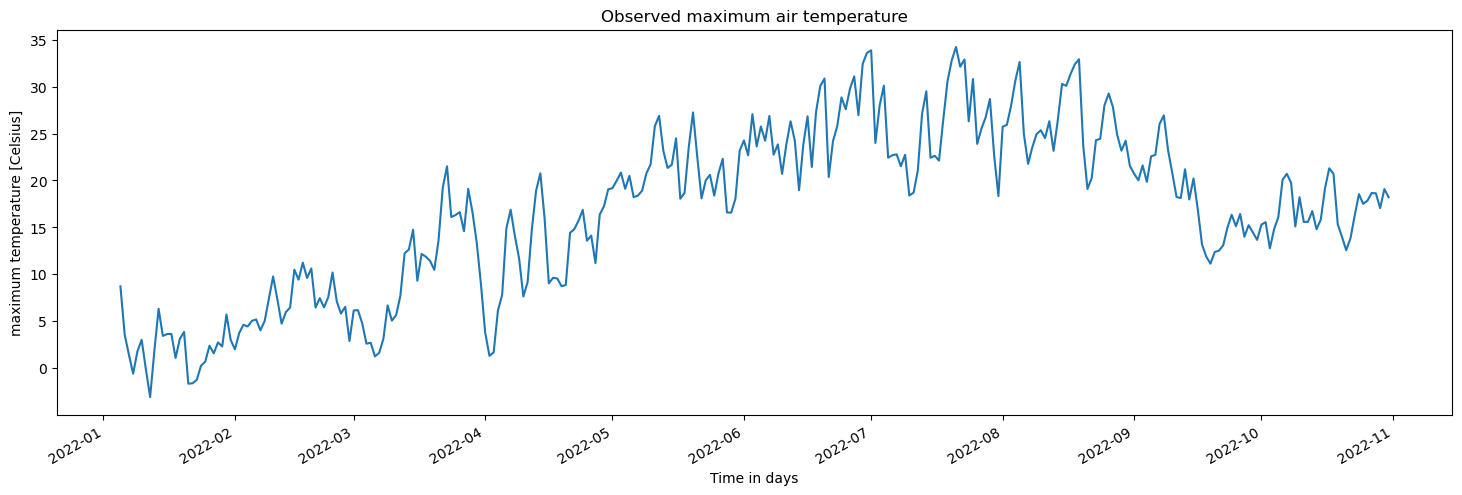

In [33]:
fig, ax=plt.subplots(figsize=(18,5))
#at_2011.isel(longitude= [0,1,2], latitude=1).plot.line(x="time")
at_year.isel(longitude= 1, latitude=1).plot.line(x="time")
#at_city[0,:,:].plot(ax=ax)
#CI_WGS.plot(ax=ax, color='red')
ax.set_title('Observed maximum air temperature')

### Landsat8 Land surface temperature

1. You can dowload the precomputed values from the RSlab webportal for years 2016-2021 # https://rslab.gr/Landsat_LST.html
2. Or you can calculate the LST directly from the Landsat imagery # 
 https://www.youtube.com/watch?v=hd7fscNTff4
3. You can download a multiple satelite pictures and combine it together, with goal o finding the best posible picture. 

Open https://rslab.gr/Landsat_LST.html and download a LST for selected period:
 - Zoom to your region
 - Select a Time period 
 - Select Landsat8
 - Click Draw a polygon and draw a polygon over your area
 - Click Calculate LST 
 - Show a LST and download a maps with good data coverage (based on the clouds, clouds=nodata)
 - Save data to you Heat_workflow folder -> data_dir

In [ ]:
L8list = glob(f"{data_dir}/LST*")
L8list

In [26]:
L8list = glob(f"{data_dir}/2016*")
#
with rasterio.open(L8list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(L8list))
#
with rasterio.open(f'{data_dir}/Landsat8_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(L8list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Text(0.5, 1.0, 'Overheated areas in Zilina city')

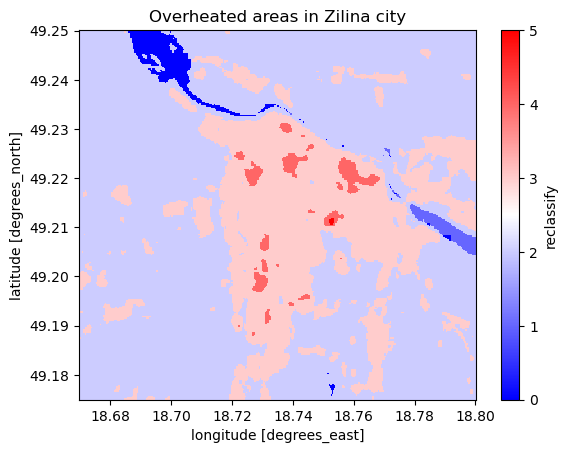

In [7]:
L8 =f'{data_dir}/Landsat8_raster_stack.tif'
L8 = xr.open_dataset(L8)
L8=L8.max(dim='band', skipna=True,  keep_attrs=True)
L8lst2016=L8['band_data']
L8lst2016=L8lst2016.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
lc_bins=[0,20, 30, 40, 50, 100]
lc_values=[0, 1, 2, 3, 4, 5]
lc_class = reclassify(L8lst2016, bins=lc_bins, new_values=lc_values)
lc_class.plot(cmap='bwr')
plt.title('Overheated areas in Zilina city') 

In [20]:
#rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
#HWEUp_23_40.rio.write_crs(rotated_pole, inplace=True)
lc_class.rio.to_raster(raster_path=f'{results_dir}/LSTZA.tif')

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/

### Calculation of the Landsat LST from Landsat 8 - 9 imagery

Calculation of the Landsat LST from Landsat 8 - 9 imagery
data are from european space agency: https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage
For the data download you need to choose the level of the data L1 or L2.
L1 level contains all 11 bands
L2 level contains bands 1-7 and band 10
We need to download the L8-9: https://www.youtube.com/watch?v=Eug32jeK8Gw

data: https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage

process: https://www.youtube.com/watch?v=hd7fscNTff4

### You do not need to calculate you can download it from https://rslab.gr/Landsat_LST.html for years 2016-2021

In [ ]:
b4=b4['band_data']
b5=b5['band_data']
b10=b10['band_data']

In [ ]:
# Radiance
rad=0.00033420 * b10 + 0.1

In [ ]:
# Brightest temperature
bt=1321.0789/np.log(774.8853/rad + 1)-272.15

In [ ]:
# Normalized difference vegetation index
ndvi=(b5-b4)/(b5+b4)
ndvi_min=ndvi.min(skipna=True)
ndvi_max=ndvi.max(skipna=True)

In [ ]:
# Proportion of the Vegetation 
pv=((ndvi +  ndvi_min)/(ndvi_max+ndvi_min))**2

In [ ]:
# emisivity
emi=0.004*pv+0.986

In [ ]:
# land surface temperature
LST=(bt+1)+10.8*(bt/14380)*np.log(emi)

# 4. Exposure and vulnerability of the population 


- We can use the maps of the distribution of the population across the interested area and look if the most populated areas overlay with the most overheated parts. 

- For the Zilina pilot, we collected data from the Zilina municipality office about the buildings that are usually crowded with huge masses of people, e.g. hospitals, stadiums, main squares, big shopping centres, main roads, and bigger factories...  

- If places like these are overheated, a huge number of people can be negatively influenced by the Heat. With that, the risk probability also rises, and thus, these areas are prioritized for the Heat mitigation measures.  

### Critical infrastructure for Zilina city
- these are local data from Zilina 
- in the next step we will use the OSM critical infrastructure data for whole EU

In [13]:
ci=f'{data_dir}/ci_features_ZA.shp'
CI=gpd.read_file(ci)
CI_WGS=CI.to_crs(epsg=4326)

### Vulnerable population

 sources:
- https://data.humdata.org/dataset/worldpop-age-and-sex-structures-for-slovakia
- https://data.humdata.org/dataset?dataseries_name=Data%20for%20Good%20at%20Meta%20-%20High%20Resolution%20Population%20Density%20Maps%20and%20Demographic%20Estimates&groups=alb&q=&sort=last_modified%20desc&ext_page_size=25
 
 1. you need to select in the Data Series palete - High Resolution Population Density Maps + Demographic Estimates
 2. Download the maps for the most vulnerable groups of the population seniors 65+ years and children under 5years 
 3. When you downloaded all these maps to the Heat-workflow data folder you  can youse this code for data handling:
     - in the first step we load all the maps of the critical population 
     - then we caculate the sum of the vulnerable population from each of the maps
     - we classified the maps to 5 groups (equal interval)
     - plot it next to map of overheated areas.


In [28]:
S2list = glob( f'{data_dir}/svk*')
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open(f'{data_dir}/Population_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [11]:
pop=f'{data_dir}/Population_raster_stack.tif'
pop = xr.open_dataset(pop)
pop=pop.sum(dim='band', skipna=True,  keep_attrs=True)
pop=pop['band_data']
pop=pop.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# reclass of the population map by the density of the vulnerable group of people over 65+ years
# 0 - = without population
# 0 - 0.6 = low density
# 0.6 - 1.2 = medium density
# 1.2 - 1.8 = high density 
pop_bins=[0, 0.3, 0.6, 0.9, 1.2, 1.5]
pop_values=[0, 1, 2, 3, 4, 5]
pop_class = reclassify(pop, bins=pop_bins, new_values=pop_values)

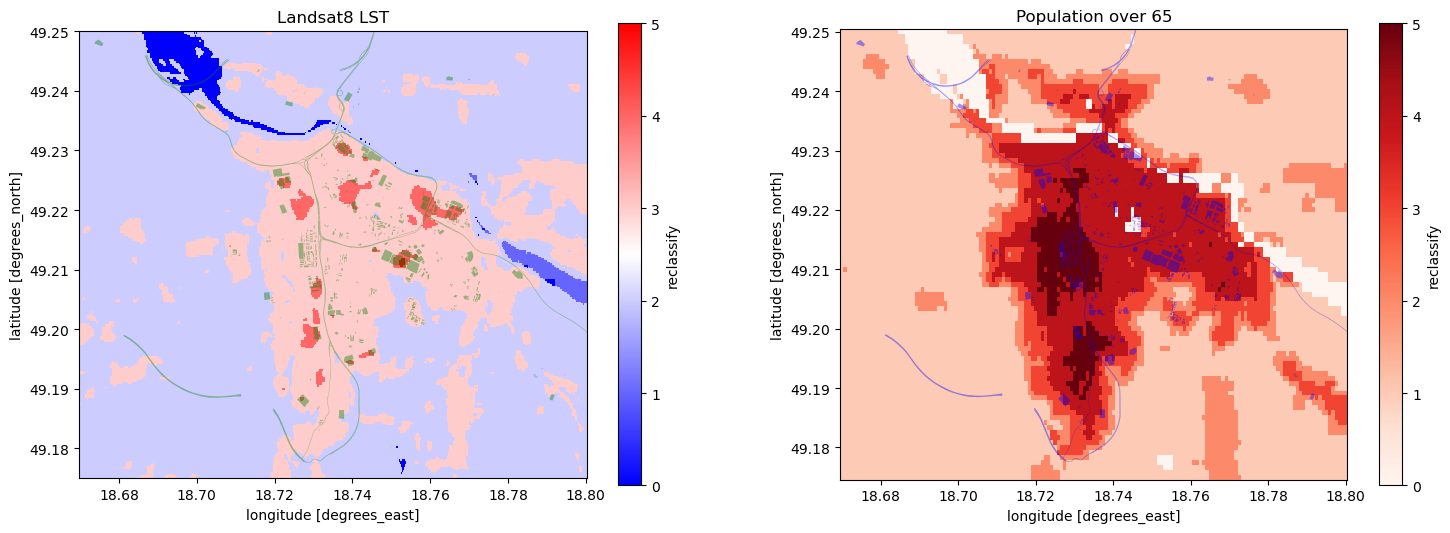

In [14]:
# plot of the Landsat8 LST and population concetration over specified age 
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
lc_class.plot(ax=axes[0], cmap='bwr')
axes[0].set_title('Landsat8 LST')
CI_WGS.plot(ax=axes[0], color='green', alpha=0.4) 
pop_class.plot(ax=axes[1], cmap='Reds')
axes[1].set_title('Population over 65')
CI_WGS.plot(ax=axes[1], color='blue', alpha=0.4)
plt.draw()

Save data on the disk

In [68]:
lc_class.rio.to_raster(raster_path=f'{results_dir}/risk_LST.tif')
pop_class.rio.to_raster(raster_path=f'{results_dir}/risk_pop.tif')

Load of the data 

In [69]:
S2list = glob( f'{results_dir}/risk_*.tif')
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open(f'{results_dir}/risk_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Text(0.5, 1.0, 'Heat-wave risk identification in Zilina')

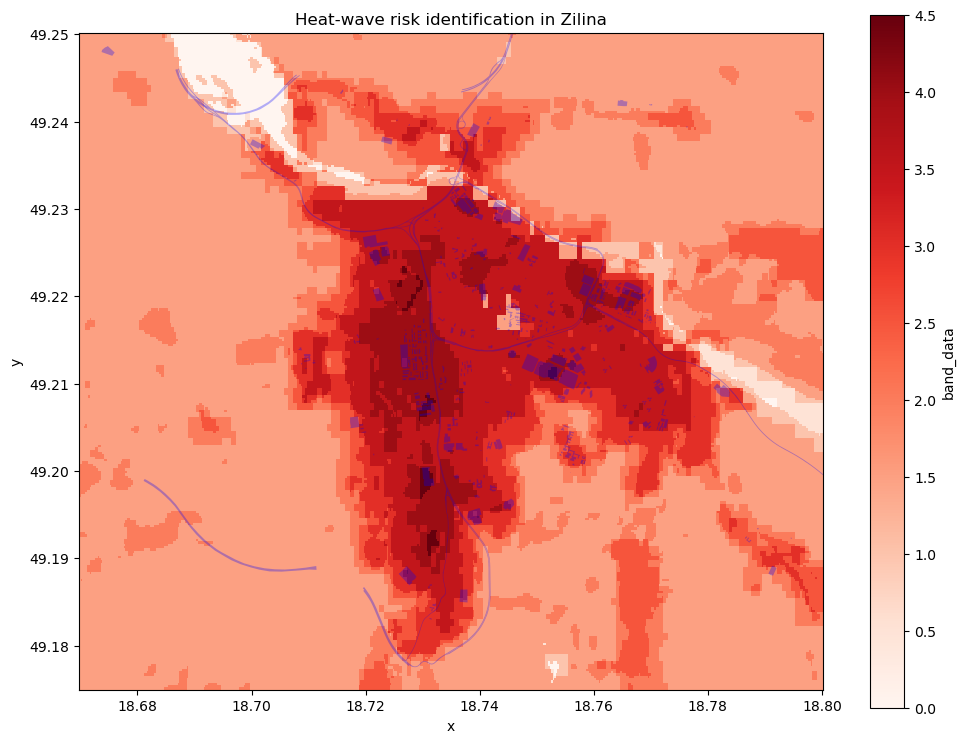

In [24]:
risk=f'{results_dir}/risk_raster_stack.tif'
risk = xr.open_dataset(risk)
risk=risk['band_data']
risk=risk.sum(dim='band', skipna=True,  keep_attrs=True)
risk2=risk/2
fig, ax=plt.subplots(figsize=(12,9))
risk2.plot(ax=ax, cmap='Reds')
CI_WGS.plot(ax=ax, color='blue', alpha=0.3)
#CI_centroids2.plot(ax=ax, color='blue')
ax.set_title('Heat-wave risk identification in Zilina')

Save on disk

In [16]:
risk2.rio.to_raster(raster_path=f'{results_dir}/Heatwave_risk_identificationZA.tif')

- Based on the risk interpretation map (above), we can identify the places wich are most influenced by the Heat-waves (dark red), for the better visualisation we can load a map with leafmap (below).
- In this notebook we can also learn more about how to adapt to the heat-waves (part 6.), or how to interpret this risk map (risk matrix below)


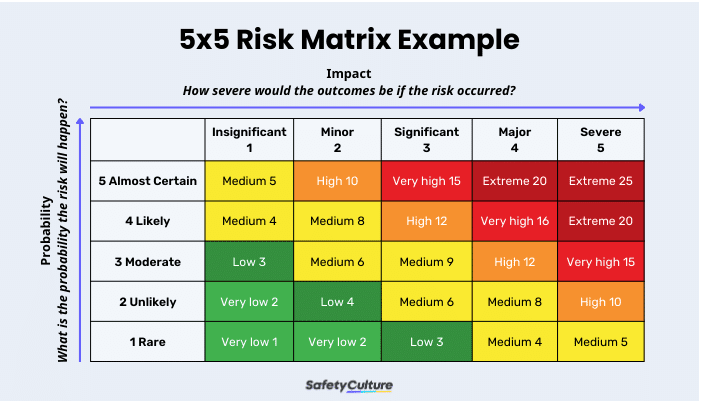

### Interactive mapping

1. https://github.com/banesullivan/localtileserver
2. https://leafmap.org/
3. https://leafmap.org/notebooks/32_local_tile/

This part is only informative, you can upload a maps from the results folder, and use the leafmap gui as an GIS sowftware

In [8]:
import os
import leafmap.leafmap as leafmap

In [9]:
m = leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# 5. Adaptation 
### Sentinel 2, July 2016 spectral band  5 days composite

Data about vegetation characteristcs give us the information about the green status of the cities, which is one of the best indicators of the city resilience to the heat-wave events. 
https://geoikp.operandum-project.eu/about

- Sentinel2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI). The Sentinel 2. data with the resolution of the 10m are suitable also for the small cities to identified the green areas, and condition of the vegetation. The green (conected with vegetation) and blue (conected with water) are best mitigation measures against the overheating of the city areas (see the GeoIkp platform: https://geoikp.operandum-project.eu/data/map).  Download: https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30

You can work with the Sentinel2 products (NDVI) which are precomputed and avilable in the [https://dataspace.copernicus.eu/browser/?zoom=13&lat=48.23799&lng=17.09335&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&fromTime=2023-10-14T00%3A00%3A00.000Z&toTime=2023-10-14T23%3A59%3A59.999Z&layerId=3_NDVI&demSource3D=%22MAPZEN%22&cloudCoverage=30].

The NDVI is the Normalized Difference Vegetation Index is a simple, but effective index for quantifying green vegetation. It is a measure of the state of vegetation health based on how plants reflect light at certain wavelengths. The value range of the NDVI is -1 to 1. Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1to 0.1) generally correspond to barren areas of rock, sand, or snow. Low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1). More information about the NDVI you can find here [https://custom-scripts.sentinel-hub.com/sentinel-2/ndvi/] and here [https://eos.com/make-an-analysis/ndvi/]
If you dicide to download the Sentinel2 bands you can calculate the NDVI directly from bands 8 and 4.

Process od download step by step:
- On the provided website, Firslty, you need to create an account and login.
- Secondly, go to search, select the Sentinel2, L2A product
- Select the time range which you prefer (for the connection to heat-wave select months June, July, August)
- Select the cloud cover to 10% (your area shoulb without clouds)
- Zoom to your area and click on Search. 
- Select the image which you prefare and download.
- After the download you need to unzip the folder - open the folder - go to Granule - IMG_DATA - R10m - select B04 and B08
- Or you can extract all bands from R10, R20, R60 and create a raster stack. (when you create a raster  stact read only the B8 and B4)

### This part is only informative, you do not need to calculate it, you can use the precomputed data from: [https://dataspace.copernicus.eu/browser/?zoom=13&lat=48.23799&lng=17.09335&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&fromTime=2023-10-14T00%3A00%3A00.000Z&toTime=2023-10-14T23%3A59%3A59.999Z&layerId=3_NDVI&demSource3D=%22MAPZEN%22&cloudCoverage=30].

In [ ]:
S2list = glob( f'{results_dir}/*.jp2')
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open(f'{results_dir}/Sentinel_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

<Axes: title={'center': 'NDVI Sentinel2 for Zilina city'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

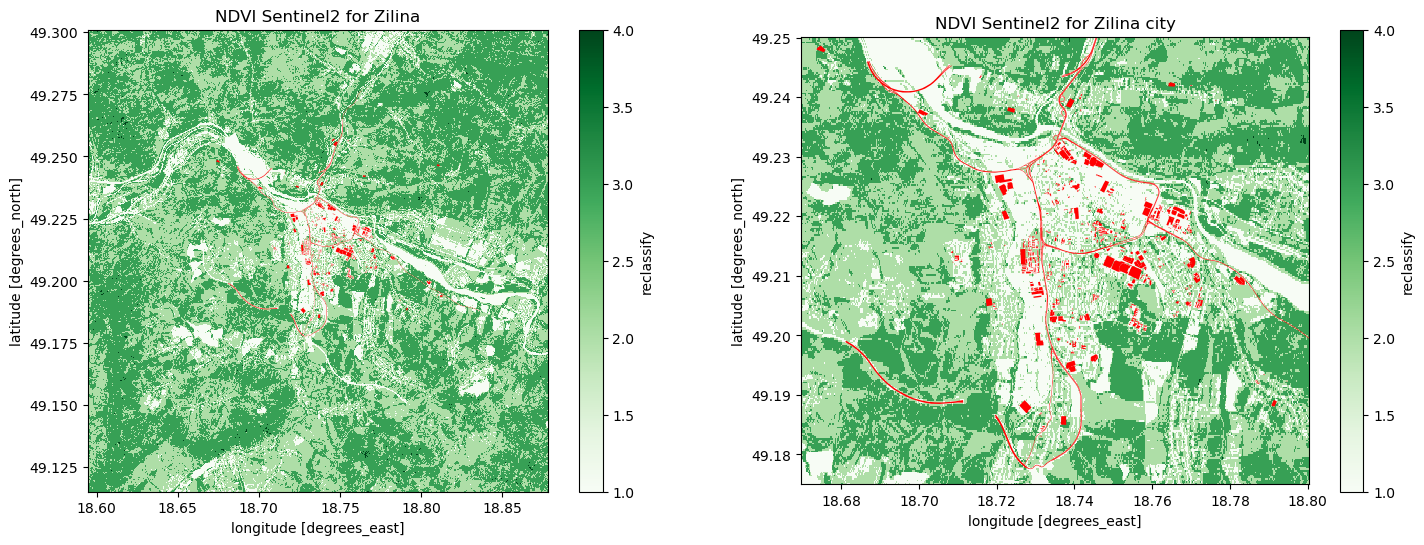

In [54]:
S2jul2016=f'{results_dir}/Sentinel_raster_stack.tif'
S2jul16 = xr.open_dataset(S2jul2016)
S2=S2jul16['band_data']
B4=S2[0]
B8=S2[1]
NDVI=(B8-B4)/(B8+B4)
#NDVI.plot()
NDVI.rio.write_crs("epsg:32633", inplace=True)
S2_NDVI=NDVI.copy()
S2NDVI84=S2_NDVI.rio.reproject_match(LS)
## RECLASS
# NDVI 1 class -1.0 ~ 0.1 [1] Bare areas or rock, water, sand or snow, 
#               0.1 ~ 0.2 [2] Grass 
#               0.2 ~ 0.4 [3] Shrub and grassland
#               0.4 ~ 0.6 [4] Mixed Forest and Shrubs
#               0.6 ~ 0.8 [5] Forest
#               0.8 ~ 1.0 [6] Dense forest       
## JUNE
NDVI_bins=[-1, 0.2, 0.4, 0.6, 0.8, 1]
NDVI_values=[0, 1, 2, 3, 4, 5]
S2NDVI84_class = reclassify(S2NDVI84, bins=NDVI_bins, new_values=NDVI_values)
S2_City=S2NDVI84_class.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# Plot Cordex, Chelsa, Landsat
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
S2NDVI84_class.plot(ax=axes[0], cmap='Greens')
axes[0].set_title('NDVI Sentinel2 for Zilina')
CI_WGS.plot(ax=axes[0], color='red') ### it will be best to plot it hollow 
S2_City.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('NDVI Sentinel2 for Zilina city')
CI_WGS.plot(ax=axes[1], color='red')